# Homework 3 - Find the perfect place to stay in Texas!

<p align="center">
<img src="https://hd.tudocdn.net/731085?w=646&h=284">
</p>

The homework consists in analyzing the text of Airbnb property listings and building a search engine.

## Our Solution:
We have decided to split the homework part: Engine and Visualization, in order to maximize the readability and apply some design patterns.
The engine is a module named __seach_engine.py__ which contains all the classes used to do all the computation nedded. In the module there are three classes:
* NLP: This class is responsible to do all the computation for manipulate texts, for better understaning there are the docstirngs inside the methods of this class.
* FileHandler: This is responsible to handle all the iteration between files, after all you can do everything only with this module, if you don't have the main csv file, there are many try-catch blocks to handle the dowload of it and proceed without any interrupts.
* Miner: This is the [controller](https://it.wikipedia.org/wiki/GRASP#Controller), it's the engine of all the computations. Inside this class there are the main functions to get all the results.

In [1]:
import search_engine as se

## Step 1: Download the data
We've decided to write a procedure to download the data automatically and store it in the working directory of the project.

In [2]:
file_handler = se.FileHandler()
file_handler._download_csv()

'_download_csv'  0.21 s


'OK'

## Step 2: Create documents
In order to maintain a real view of how works a real seach engine, we've decided to split the documents in two sub-directories: one with the processed tsv files and the other with the raw data.

### Step 2.1: Create raw_data directory

In [3]:
file_handler.save_raw_docs()

'save_raw_docs'  7.19 s


'OK'

### Step 2.2: Create clean_data directory

In [4]:
file_handler._tsv_to_tsv_docs()

'_csv_to_pickle'  0.26 s
'_pickle_to_df'  0.04 s
'_pickle_to_df'  0.33 s
'_csv_to_tsv'  70.05 s
'_tsv_to_tsv_docs'  6.79 s
'_tsv_to_tsv_docs'  76.83 s


'OK'

## Step 3: Search Engine

# \< DESCRIPTION\>

In [5]:
miner = se.Miner()

### Step 3.1 Conjunctive Query

#### Step 3.1.1: Build Index & Vocab

In [6]:
miner.build_vocab(save=True)

'build_vocab'  2.99 s


'OK, vocabulary in the attribute Miner().vocab'

In [7]:
miner.build_inverted_index_normal(save=True)

'build_inverted_index_normal'  3.89 s


'OK, inverted index set in the attribute Miner().inverted_index_no_tfidf'

### Step 3.1.2: Execute the query!

In [8]:
conjunct_result = miner.conjunctive_result()
conjunct_result[['title', 'description', 'city', 'url']]

Insert your query: brand new luxury house
'_query_builder'  0.01 s
'_docs_containing_all_the_query'  0.00 s
'conjunctive_result'  0.05 s


,title,description,city,url
0,Luxury Carriage House-Travis Heights,"Welcome to The Hideaway Carriage House, a priv...",Austin,https://www.airbnb.com/rooms/705858?location=C...
1,Plano Luxury ensuite,Surround yourself in this luxury private resid...,Plano,https://www.airbnb.com/rooms/2637249?location=...
2,Luxury Carriage House-Travis Heights,"Welcome to The Hideaway Carriage House, a priv...",Austin,https://www.airbnb.com/rooms/705858?location=B...
3,Luxury 5 bedroom. Huge yard. Pool. By Stadium.,Beautiful .53 acre lot with tons of trees and ...,Arlington,https://www.airbnb.com/rooms/13786320?location...
4,"Uptown remodel in 2016 w/Heated Pool, NC location",This Mid-Century home was 100% remodeled in 20...,San Antonio,https://www.airbnb.com/rooms/15982388?location...
5,Luxury 5 bedroom. Huge yard. Pool. By Stadium.,Beautiful .53 acre lot with tons of trees and ...,Arlington,https://www.airbnb.com/rooms/13786320?location...
6,Luxurious Peaceful Heights Tree House,Brand new apartment with all the amenities. In...,Houston,https://www.airbnb.com/rooms/18962233?location...


## Step 3.2: Conjunctive query & Ranking score

### Step 3.2.1: Build the TFIDF inverted index

In [9]:
miner.TFIDF(save=True)

'TF'  3.52 s
'_load_inverted_index_no_tfidf'  0.25 s
'IDF'  0.01 s
'TFIDF'  6.79 s


### Step 3.2.2.: Execute the query!

In [10]:
df = miner.conjunct_ranking_result()
df

Insert your query: brand new luxury house
'_query_builder'  0.01 s
'_docs_containing_all_the_query'  0.00 s
'_cosine_dist_one'  0.00 s
'_cosine_dist_one'  0.00 s
'_cosine_dist_one'  0.00 s
'_cosine_dist_one'  0.00 s
'_cosine_dist_one'  0.00 s
'_cosine_dist_one'  0.00 s
'_cosine_dist_one'  0.00 s
'cosine_dist_all'  0.00 s
'heapify'  0.00 s
'conjunct_ranking_result'  0.06 s


,city,description,score,title,url
0,Houston,Brand new apartment with all the amenities. In...,0.975532,Luxurious Peaceful Heights Tree House,https://www.airbnb.com/rooms/18962233?location...
1,San Antonio,This Mid-Century home was 100% remodeled in 20...,0.975532,"Uptown remodel in 2016 w/Heated Pool, NC location",https://www.airbnb.com/rooms/15982388?location...
2,Arlington,Beautiful .53 acre lot with tons of trees and ...,0.874813,Luxury 5 bedroom. Huge yard. Pool. By Stadium.,https://www.airbnb.com/rooms/13786320?location...
3,Arlington,Beautiful .53 acre lot with tons of trees and ...,0.874813,Luxury 5 bedroom. Huge yard. Pool. By Stadium.,https://www.airbnb.com/rooms/13786320?location...
4,Plano,Surround yourself in this luxury private resid...,0.851552,Plano Luxury ensuite,https://www.airbnb.com/rooms/2637249?location=...
5,Austin,"Welcome to The Hideaway Carriage House, a priv...",0.818780,Luxury Carriage House-Travis Heights,https://www.airbnb.com/rooms/705858?location=C...
6,Austin,"Welcome to The Hideaway Carriage House, a priv...",0.818780,Luxury Carriage House-Travis Heights,https://www.airbnb.com/rooms/705858?location=B...


## Step 4: Define a new score!

In [11]:
df = miner.get_all_scores().sort_values('score', ascending=False)
df[['title', 'description', 'city', 'url', 'score']]

Insert your query: brand new luxury house
'_query_builder'  0.01 s
'_docs_containing_all_the_query'  0.00 s
'conjunctive_result'  0.05 s
What price you want?100
Hou many rooms you want?3
In which city you would stay?Houston
'_score'  0.00 s
'_score'  0.00 s
'_score'  0.00 s
'_score'  0.00 s
'_score'  0.00 s
'_score'  0.00 s
'_score'  0.00 s
'get_all_scores'  0.08 s


,title,description,city,url,score
6,Luxurious Peaceful Heights Tree House,Brand new apartment with all the amenities. In...,Houston,https://www.airbnb.com/rooms/18962233?location...,0.761313
4,"Uptown remodel in 2016 w/Heated Pool, NC location",This Mid-Century home was 100% remodeled in 20...,San Antonio,https://www.airbnb.com/rooms/15982388?location...,0.686482
1,Plano Luxury ensuite,Surround yourself in this luxury private resid...,Plano,https://www.airbnb.com/rooms/2637249?location=...,0.665884
0,Luxury Carriage House-Travis Heights,"Welcome to The Hideaway Carriage House, a priv...",Austin,https://www.airbnb.com/rooms/705858?location=C...,0.576681
2,Luxury Carriage House-Travis Heights,"Welcome to The Hideaway Carriage House, a priv...",Austin,https://www.airbnb.com/rooms/705858?location=B...,0.576681
3,Luxury 5 bedroom. Huge yard. Pool. By Stadium.,Beautiful .53 acre lot with tons of trees and ...,Arlington,https://www.airbnb.com/rooms/13786320?location...,0.482175
5,Luxury 5 bedroom. Huge yard. Pool. By Stadium.,Beautiful .53 acre lot with tons of trees and ...,Arlington,https://www.airbnb.com/rooms/13786320?location...,0.482175


## Bonus Step: Make a nice visualization!

In [12]:
import pandas as pd
import folium
from geopy import distance

 Location(Lyndon B. Johnson Space Center, 2101, NASA Parkway, Houston, Harris County, Texas, 77058, USA, (29.5645716, -95.092752953515, 0.0))

In [13]:
user_coords = input("coordinate(y, x): ").split()  #geting user coordinates
user_coords = [float(i) for i in user_coords]
radius = float(input("Enter the radius you are interested in: "))

coordinate(y, x): 29.5645716 -95.092752953515
Enter the radius you are interested in: 5


In [14]:
df=pd.read_csv("airbnb.csv", usecols=['latitude','longitude']) #selecting the two important columns
df = df.dropna() # removing Nan values, since we have to calculate the distances
df.head(10) #just for looking through the first 10 rows of our data frame

,latitude,longitude
0,30.020138,-95.293996
1,29.503068,-98.447688
2,29.829352,-95.081549
3,30.637304,-96.337846
4,32.747097,-97.286434
5,30.370455,-95.385319
6,30.109838,-97.473417
7,32.689611,-97.298161
8,28.103726,-97.025832
9,29.480646,-98.495692


In [15]:
#creating a nested list containing latitudes and alongitudes for each house
temp=[]
for index, data in df.iterrows():         
    temp.append(data.tolist())
temp[:5]

[[30.0201379199512, -95.29399600425128],
 [29.503067675606104, -98.4476879378504],
 [29.829352227214898, -95.0815494887563],
 [30.6373042787676, -96.33784597296308],
 [32.7470973543511, -97.2864343970125]]

In [16]:
#calculating distances for each house coordinate from the given user coordinates
#we have used geodesic distance instead of Great-circle distance
#and also we have choosed kilometers instead of miles in geodesic distance
distances = [distance.distance(user_coords, elem).km for elem in temp]
distances[0:5]

[54.11787019501391,
 325.2675671974499,
 29.370251612436505,
 168.94753325670953,
 410.1592584098694]

In [17]:
m = folium.Map(
    location=user_coords,      #creating a base map using user coordinates
    tiles='OpenStreetMap',
    zoom_start=13
)

folium.Circle(
    radius=radius*1e3,
    location=user_coords,      # creating a circle based on the user coordinates
                               # we have choosed folium.Circle instead of folium.CircleMarker 
                               # since it reflects radii in units of meters not pixels
    color='green',
    fill=True,
).add_to(m)

folium.Marker(
    location=user_coords,
    popup='Current User Location',      # creating marker
    icon=folium.Icon(icon='info-sign')
).add_to(m)


for i in range(len(distances)):
    if distances[i]<=radius:     #showing houses in the given redius
            
        folium.Marker(
        temp[i],
        popup='House'
        ).add_to(m)
m.save("map.html")


In [18]:
m

## Appendix A: What is behind our score function

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from math import log
from mpl_toolkits.mplot3d import Axes3D                                 
from matplotlib import cm
from matplotlib.ticker import LinearLocator                                

In [20]:
def price_getter(actual_price, max_price):
            if actual_price > max_price:
                return (max_price-log(actual_price))/actual_price

            else:
                return (-log(actual_price)+max_price)/max_price

def rooms_getter(actual_room_number, max_room_number):
    return min(actual_room_number/max_room_number, max_room_number/actual_room_number)

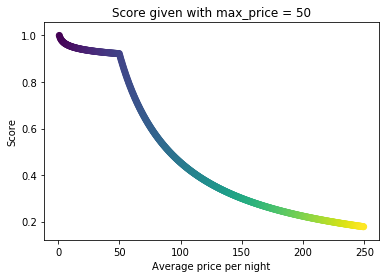

In [40]:
x = np.arange(1, 250, .5)
price_getter = np.vectorize(price_getter)
y = price_getter(x, 50)
plt.scatter(x,y, c=x, cmap=cm.viridis)
plt.xlabel('Average price per night')
plt.ylabel('Score')
plt.title('Score given with max_price = 50')
plt.show()

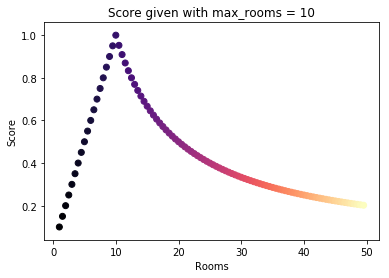

In [37]:
x = np.arange(1, 50, 0.5)
rooms_getter = np.vectorize(rooms_getter)
y = rooms_getter(x, 10)
plt.scatter(x,y, c=x, cmap=cm.magma)
plt.xlabel('Rooms')
plt.ylabel('Score')
plt.title('Score given with max_rooms = 10')
plt.show()

For the score given by the distance, the score is a simple inverse linear function, so we found that's useless to give a plot.

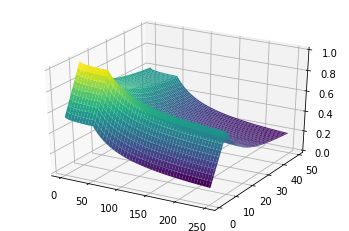

In [30]:
x = np.arange(1,250,1)
xlen = len(x)
y = np.arange(1,50,1)
ylen = len(y)
x,y = np.meshgrid(x,y)
z = (price_getter(x, 50)+rooms_getter(y, 10))/2

fig = plt.figure()
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(x,y,z, cmap=cm.viridis)
ax.set_zlim(0,1)
ax.w_zaxis.set_major_locator(LinearLocator(6))                
plt.show()